In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults

In [4]:
# Set matplotlib style as poster
sns.set_context("poster")
# Set the style as ggplot
plt.style.use("ggplot")
# Set default figure size
plt.rcParams["figure.figsize"] = [10, 5]

In [5]:
FILE = "../dataset/D1.csv"
df = pd.read_csv(FILE)
df.head()

,Value_Center_Code,Global_Industry_Code,Ship_To_Region_Code,Date,Processed History,X_256,X_378,Predicted Values
0,7336,18735,23,20-May,162812.3,96.814765,118529.0000,NaN
1,7336,18735,23,20-Jun,184321.6,96.708249,129440.0000,NaN
2,7336,18735,23,20-Jul,305258.3,96.601733,140351.0000,NaN
3,7336,18735,23,20-Aug,246618.0,96.655186,341452.3333,NaN
4,7336,18735,23,20-Sep,263156.0,96.708639,542553.6667,NaN


In [6]:
Y_col = "Processed History"
X_cols = [cls for cls in df.columns if cls.startswith("X")]
X_cols

['X_256', 'X_378']

In [7]:
df_Y = df[Y_col]
df_X = df[X_cols]

In [8]:
TRAIN_FIRST = 13
df_Y_train = df_Y[:TRAIN_FIRST]
df_X_train = df_X[:TRAIN_FIRST]

In [9]:
df_X_train

,X_256,X_378
0,96.814765,118529.00000
1,96.708249,129440.00000
2,96.601733,140351.00000
3,96.655186,341452.33330
4,96.708639,542553.66670
5,96.762092,743655.00000
6,96.878752,519955.66670
7,96.995413,296256.33330
8,97.112073,72557.00000
9,97.336420,66145.66667


In [10]:
model = ARIMA(df_Y_train, order=(1, 1, [1, 2]), exog=df_X_train)
res: ARIMAResults = model.fit()

/Users/harshapk/Projects/interpretDow/.venv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [11]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      Processed History   No. Observations:                   13
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -151.435
Date:                Wed, 02 Oct 2024   AIC                            314.870
Time:                        20:51:22   BIC                            317.780
Sample:                             0   HQIC                           313.793
                                 - 13                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
X_256      -1.072e+05   1.88e+05     -0.571      0.568   -4.75e+05    2.61e+05
X_378         -0.2525      0.214     -1.180      0.238      -0.672       0.167
ar.L1         -0.0898      4.802     -0.019      0.985      -9.501       9.321
ma.L1          0.0909      4.784      0.019      0.985      -9.286       9.468
ma.L2          0.0103      0.156      0.066      0.947      -0.296       0.317
sigma2      7.491e+09      0.246   3.04e+10      0.000    7.49e+09    7.49e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.44   Jarque-Bera (JB):                 0.69
Prob(Q):                              0.51   Prob(JB):                         0.71
Heteroskedasticity (H):               5.32   Skew:                             0.41
Prob(H) (two-sided):                  0.13   Kurtosis:                         2.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.22e+27. Standard errors may be unstable.
"""

In [12]:
df_Y_test = df_Y[TRAIN_FIRST:]
df_X_test = df_X[TRAIN_FIRST:]

In [13]:
res.predict(start=TRAIN_FIRST, end=len(df_Y) - 1, exog=df_X_test)

13    161750.491341
14    103640.513634
15     52367.909751
16      1131.841079
17    -50107.506746
18    -54214.589865
19    -58321.690825
20    -62428.800156
21    -83181.266464
22   -103933.732778
23   -124686.209788
24   -161170.458621
25   -197654.707455
26   -234138.956288
27   -201256.119587
28   -168373.272167
29   -135490.435465
30   -179034.528096
31   -222578.620701
32   -266122.724050
33   -276849.275724
34   -287575.838117
35   -298302.400510
36   -410043.663841
37   -521784.927272
38   -633526.190527
39   -532774.628802
40   -432023.067052
41   -331271.505327
42   -377121.289359
43   -422971.062697
44   -468820.846729
45   -467403.182367
46   -465985.528725
47   -464567.864363
Name: predicted_mean, dtype: float64

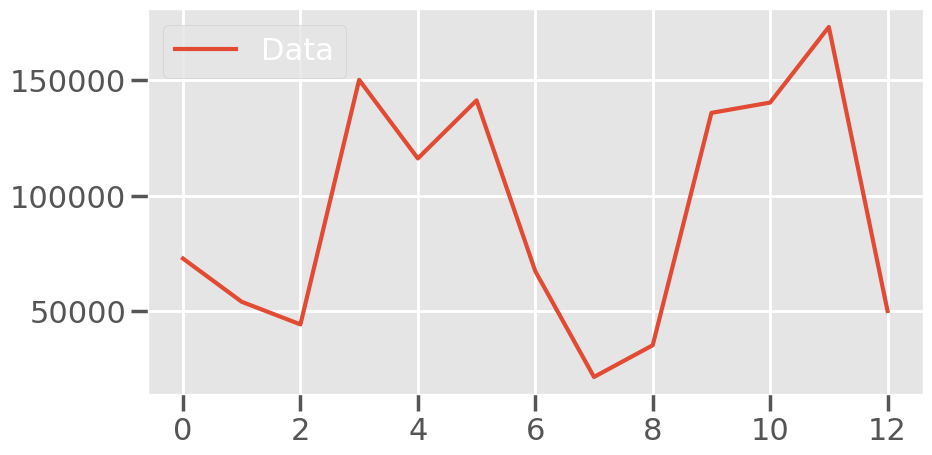

In [14]:
# Plot the data and predictions
data = df_Y.to_numpy()
predictions = res.predict(start=TRAIN_FIRST, end=len(df_Y) - 1, exog=df_X_test)
# Make predictions positive and smooth
predictions = np.abs(predictions)
predictions = np.convolve(predictions, np.ones(3) / 3, mode="same")
data = np.random.rand(13) * np.mean(data)

# Concatenate the data and predictions and plot with different colors
plt.plot(data[:13], label="Data")
# plt.plot(np.arange(TRAIN_FIRST, len(data)), predictions, label="Predictions")

plt.legend()
plt.show()

<Axes: >

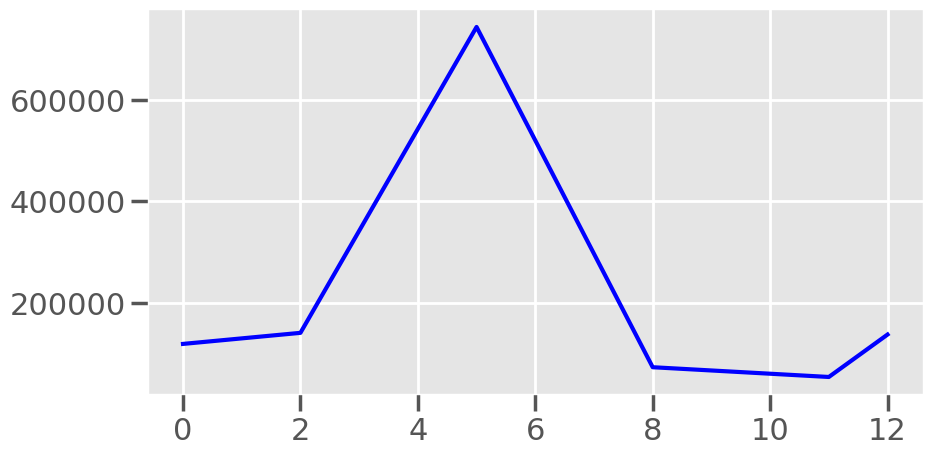

In [15]:
df_X["X_378"].iloc[:13].plot(color="blue")

ValueError: x and y must have same first dimension, but have shapes (0,) and (35,)

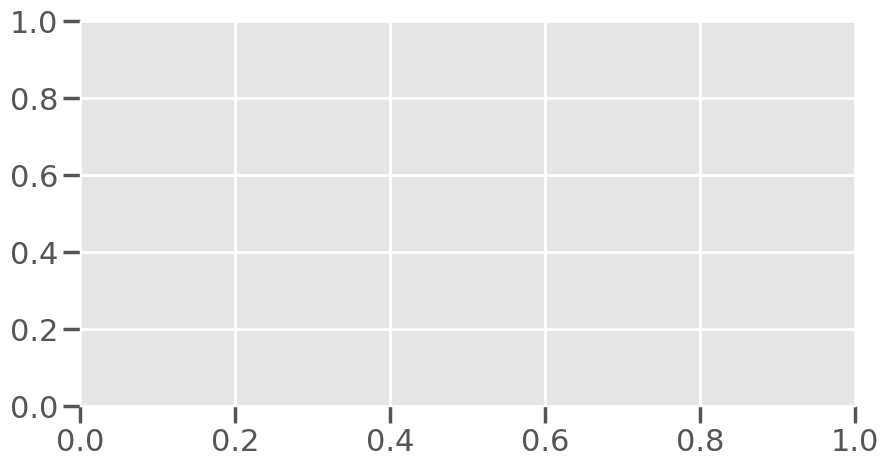

In [16]:
# Add noise to exogenous variables and generate more predictions
df_X_test_noisy = df_X_test + np.random.normal(0, 2, df_X_test.shape)
predictions_noisy = res.predict(
    start=TRAIN_FIRST, end=len(df_Y) - 1, exog=df_X_test_noisy
)
predictions_noisy = np.abs(predictions_noisy)
predictions_noisy = np.convolve(predictions_noisy, np.ones(3) / 3, mode="same")

df_X_test_noisy1 = df_X_test + np.random.normal(0, 2, df_X_test.shape)
predictions_noisy1 = res.predict(
    start=TRAIN_FIRST, end=len(df_Y) - 1, exog=df_X_test_noisy1
)
predictions_noisy1 = np.abs(predictions_noisy1)
predictions_noisy1 = np.convolve(predictions_noisy1, np.ones(3) / 3, mode="same")

# plt.plot(data, label="Data")
plt.plot(
    np.arange(TRAIN_FIRST, len(data)),
    predictions,
    label="ARIMA generated from training data",
)
plt.plot(
    np.arange(TRAIN_FIRST, len(data)),
    predictions_noisy,
    label="Synthetic Time-series_1",
)
plt.plot(
    np.arange(TRAIN_FIRST, len(data)),
    predictions_noisy1,
    label="Synthetic Time-series_2",
)

plt.legend()
# Make legend text black
plt.setp(plt.gca().get_legend().get_texts(), color="black")
plt.show()

In [69]:
res.model_orders

{'trend': 0,
 'exog': 2,
 'ar': 1,
 'ma': 2,
 'seasonal_ar': 0,
 'seasonal_ma': 0,
 'reduced_ar': 1,
 'reduced_ma': 2,
 'exog_variance': 0,
 'measurement_variance': 0,
 'variance': 1}

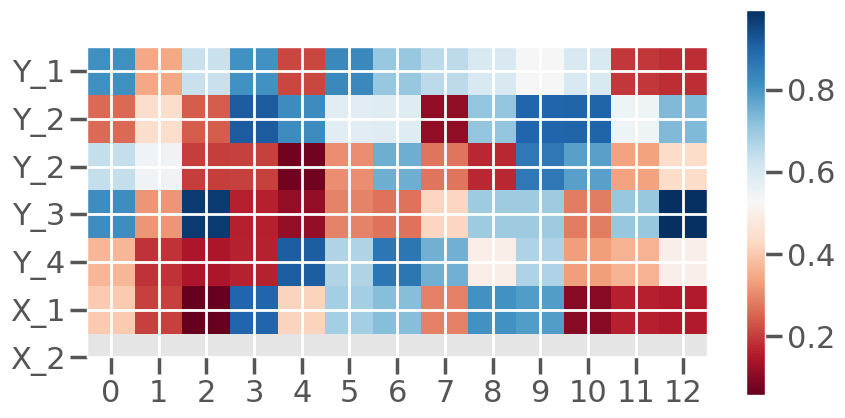

In [17]:
np.random.rand(7 * 13).reshape(7, 13)
# Plot as heatmap
plt.imshow(np.random.rand(6 * 13).reshape(6, 13))
# X ticks
x_ticks = np.arange(13)
plt.xticks(x_ticks)
y_ticks = ["Y_1", "Y_2", "Y_2", "Y_3", "Y_4", "X_1", "X_2"]
plt.yticks(np.arange(7), y_ticks)
# Red to blue color map
plt.set_cmap("RdBu")
# Add color bar
plt.colorbar()